In [1518]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import folium 
from folium.plugins import heat_map
import plotly.express as px 
pd.set_option ('display.max_columns' , 30 )
#% matplotlib inline 

In [1519]:
df = pd.read_csv("hotel_bookings.csv")
df.head(15)

hotel  is_canceled  lead_time  arrival_date_year  \
0   Resort Hotel            0        342               2015   
1   Resort Hotel            0        737               2015   
2   Resort Hotel            0          7               2015   
3   Resort Hotel            0         13               2015   
4   Resort Hotel            0         14               2015   
5   Resort Hotel            0         14               2015   
6   Resort Hotel            0          0               2015   
7   Resort Hotel            0          9               2015   
8   Resort Hotel            1         85               2015   
9   Resort Hotel            1         75               2015   
10  Resort Hotel            1         23               2015   
11  Resort Hotel            0         35               2015   
12  Resort Hotel            0         68               2015   
13  Resort Hotel            0         18               2015   
14  Resort Hotel            0         37               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                July                        27                          1   
1                July                        27                          1   
2                July                        27                          1   
3                July                        27                          1   
4                July                        27                          1   
5                July                        27                          1   
6                July                        27                          1   
7                July                        27                          1   
8                July                        27                          1   
9                July                        27                          1   
10               July                        27                          1   
11               July                        27                          1   
12               July                        27                          1   
13               July                        27                          1   
14               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                         0                     0       2       0.0       0   
1                         0                     0       2       0.0       0   
2                         0                     1       1       0.0       0   
3                         0                     1       1       0.0       0   
4                         0                     2       2       0.0       0   
5                         0                     2       2       0.0       0   
6                         0                     2       2       0.0       0   
7                         0                     2       2       0.0       0   
8                         0                     3       2       0.0       0   
9                         0                     3       2       0.0       0   
10                        0                     4       2       0.0       0   
11                        0                     4       2       0.0       0   
12                        0                     4       2       0.0       0   
13                        0                     4       2       1.0       0   
14                        0                     4       2       0.0       0   

   meal country market_segment  ... previous_cancellations  \
0    BB     PRT         Direct  ...                      0   
1    BB     PRT         Direct  ...                      0   
2    BB     GBR         Direct  ...                      0   
3    BB     GBR      Corporate  ...                      0   
4    BB     GBR      Online TA  ...                      0   
5    BB     GBR      Online TA  ...                      0   
6    BB     PRT         Direct  ...                   

In [1520]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [1521]:
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [1522]:
for column in df.columns:  
    print(column  + '    :    '   + str(len(df[column].unique())) )
    if (len(df[column].unique()) <100 ):
        print(column + '     :        ' + str(len(df[column].unique())))
        print('\n')
    

hotel    :    2
hotel     :        2


is_canceled    :    2
is_canceled     :        2


lead_time    :    479
arrival_date_year    :    3
arrival_date_year     :        3


arrival_date_month    :    12
arrival_date_month     :        12


arrival_date_week_number    :    53
arrival_date_week_number     :        53


arrival_date_day_of_month    :    31
arrival_date_day_of_month     :        31


stays_in_weekend_nights    :    17
stays_in_weekend_nights     :        17


stays_in_week_nights    :    35
stays_in_week_nights     :        35


adults    :    14
adults     :        14


children    :    6
children     :        6


babies    :    5
babies     :        5


meal    :    5
meal     :        5


country    :    178
market_segment    :    8
market_segment     :        8


distribution_channel    :    5
distribution_channel     :        5


is_repeated_guest    :    2
is_repeated_guest     :        2


previous_cancellations    :    15
previous_cancellations     :        15




In [1523]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [1524]:
# checking for null values 
null = pd.DataFrame({"Null Values ": df.isna().sum(), 'Percentage Null Values':(df.isna().sum())/(df.shape[0])*(100) })
null

Null Values   Percentage Null Values
hotel                                      0                0.000000
is_canceled                                0                0.000000
lead_time                                  0                0.000000
arrival_date_year                          0                0.000000
arrival_date_month                         0                0.000000
arrival_date_week_number                   0                0.000000
arrival_date_day_of_month                  0                0.000000
stays_in_weekend_nights                    0                0.000000
stays_in_week_nights                       0                0.000000
adults                                     0                0.000000
children                                   4                0.003350
babies                                     0                0.000000
meal                                       0                0.000000
country                                  488                0.408744
market_segment                             0                0.000000
distribution_channel                       0                0.000000
is_repeated_guest                          0                0.000000
previous_cancellations                     0                0.000000
previous_bookings_not_canceled             0                0.000000
reserved_room_type                         0                0.000000
assigned_room_type                         0                0.000000
booking_changes                            0                0.000000
deposit_type                               0                0.000000
agent                                  16340               13.686238
company                               112593               94.306893
days_in_waiting_list                       0                0.000000
customer_type                              0                0.000000
adr                                        0                0.000000
required_car_parking_spaces                0                0.000000
total_of_special_requests                  0                0.000000
reservation_status                         0                0.000000
reservation_status_date                    0                0.000000

In [1525]:
# filling null values with 0 
df.fillna(0 , inplace=True)

In [1526]:
df.shape

(119390, 32)

In [1527]:
# Adults , babies and children cant be zero at the same time , so dropping the rows having all these zeros at the same time 

filter = (df.children==0) & (df.adults==0) & (df.babies==0)

In [1528]:
df[filter]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel            0          1               2015   
2409    Resort Hotel            0          0               2015   
3181    Resort Hotel            0         36               2015   
3684    Resort Hotel            0        165               2015   
3708    Resort Hotel            0        165               2015   
...              ...          ...        ...                ...   
115029    City Hotel            0        107               2017   
115091    City Hotel            0          1               2017   
116251    City Hotel            0         44               2017   
116534    City Hotel            0          2               2017   
117087    City Hotel            0        170               2017   

       arrival_date_month  arrival_date_week_number  \
2224              October                        41   
2409              October                        42   
3181             November                        47   
3684             December                        53   
3708             December                        53   
...                   ...                       ...   
115029               June                        26   
115091               June                        26   
116251               July                        28   
116534               July                        28   
117087               July                        30   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224                            6                        0   
2409                           12                        0   
3181                           20                        1   
3684                           30                        1   
3708                           30                        2   
...                           ...                      ...   
115029                         27                        0   
115091                         30                        0   
116251                         15                        1   
116534                         15                        2   
117087                         27                        0   

        stays_in_week_nights  adults  children  babies meal country  \
2224                       3       0       0.0       0   SC     PRT   
2409                       0       0       0.0       0   SC     PRT   
3181                       2       0       0.0       0   SC     ESP   
3684                       4       0       0.0       0   SC     PRT   
3708                       4       0       0.0       0   SC     PRT   
...                      ...     ...       ...     ...  ...     ...   
115029                     3       0       0.0       0   BB     CHE   
115091                     1       0       0.0       0   SC     PRT   
116251                     1       0       0.0       0   SC     SWE   
116534                     5       0       0.0       0   SC     RUS   
117087                     2       0       0.0       0   BB     BRA   

       market_segment  ... previous_cancellations  \
2224        Corporate  ...                      0   
2409        Corporate  ...                      0   
3181           Groups  ...                      0   
3684           Groups  ...                      0   
3708           Groups  ...                      0   
...               ...  ...                    ...   
115029      Online TA  ...                      0   
115091  Complementary  ...                      0   
116251      Online TA  ...                      0   
116534      Online TA  ...                      0   
117087  Offline TA/TO  ...                      0   

        previous_bookings_not_canceled  reserved_room_type  \
2224                                 0                   A   
2409                                 0                   A   
3181                                 0                   A   
3684                                 0                   A   
3708

In [1529]:
df = df[~filter]

In [1530]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment  ... previous_cancellations  \
0              Direct  ...                      0   
1              Direct  ...                      0   
2              Direct  ...                      0   
3           Corporate  ...                      0   
4           Online TA  ...                      0   
...               ...  ...                    ...   
119385  Offline TA/TO  ...                      0   
119386      Online TA  ...                      0   
119387      Online TA  ...                      0   
119388      Online TA  ...                      0   
119389      Online TA  ...                      0   

        previous_bookings_not_canceled  reserved_room_type  \
0                                    0                   C   
1                                    0                   C   
2                                    0                   A   
3                                    0                   A   
4   

In [1531]:
df[filter]

C:\Users\arfan\AppData\Local\Temp\ipykernel_16108\1940024178.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

[0 rows x 32 columns]

In [1532]:
df.shape

(119210, 32)

### EDA (Exploratory Data Analysis)

In [1533]:
# From where the guests are coming 

country_wise_guests = df[df['is_canceled']==0]['country'].value_counts().reset_index()

country_wise_guests.columns = ['country' , 'No of guests']

country_wise_guests



country  No of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     BHR             1
162     DJI             1
163     MLI             1
164     NPL             1
165     FRO             1

[166 rows x 2 columns]

In [1534]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations=country_wise_guests['country'] , color =country_wise_guests['country'],
                            hover_name =country_wise_guests['country'] )
guests_map.show()

In [1535]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests , locations = country_wise_guests['country'], color=country_wise_guests['No of guests'],
                          hover_name=country_wise_guests['country'])

guests_map.show()

In [1536]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment  ... previous_cancellations  \
0   BB     PRT         Direct  ...                      0   
1   BB     PRT         Direct  ...                      0   
2   BB     GBR         Direct  ...                      0   
3   BB     GBR      Corporate  ...                      0   
4   BB     GBR      Online TA  ...                      0   

   previous_bookings_not_canceled  reserved_room_type  assigned_room_type  \
0                               0                   C                   C   
1                               0                   C                   C   
2                               0                   A                   C   
3                               0                   A                   A   
4                               0                   A                   A   

  booking_changes deposit_type  agent company  days_in_waiting_list  \
0               3   No Deposit    0.0     0.0                     0   
1               4   No Deposit    0.0     0.0                     0   
2               0   No Deposit    0.0     0.0                     0   
3               0   No Deposit  304.0     0.0                     0   
4               0   No Deposit  240.0     0.0                     0   

   customer_type   adr required_car_parking_spaces  total_of_special_requests  \
0      Transient   0.0                           0                          0   
1      Transient   0.0                           0                          0   
2      Transient  75.0                           0                          0   
3      Transient  75.0                           0                          0   
4      Transient  98.0                           0                          1   

   reservation_status  reservation_status_date  
0           Check-Out               2015-07-01  
1           Check-Out               2015-07-01  
2           Check-Out               2015-07-02  
3           Check-Out               2015-07-02  
4           Check-Out               2015-07-03  

[5 rows x 32 columns]

In [1537]:
# Average daily Rate 

data = df[df['is_canceled']==0]
px.box(data_frame = data , x='reserved_room_type' , y = 'adr' , color = 'hotel' , template = 'plotly_white')

In [1538]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled']==0)]
data_city = df[(df['hotel']== 'City Hotel') & (df['is_canceled']==0)]

In [1539]:
data_resort

hotel  is_canceled  lead_time  arrival_date_year  \
0      Resort Hotel            0        342               2015   
1      Resort Hotel            0        737               2015   
2      Resort Hotel            0          7               2015   
3      Resort Hotel            0         13               2015   
4      Resort Hotel            0         14               2015   
...             ...          ...        ...                ...   
40055  Resort Hotel            0        212               2017   
40056  Resort Hotel            0        169               2017   
40057  Resort Hotel            0        204               2017   
40058  Resort Hotel            0        211               2017   
40059  Resort Hotel            0        161               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   July                        27                          1   
1                   July                        27                          1   
2                   July                        27                          1   
3                   July                        27                          1   
4                   July                        27                          1   
...                  ...                       ...                        ...   
40055             August                        35                         31   
40056             August                        35                         30   
40057             August                        35                         29   
40058             August                        35                         31   
40059             August                        35                         31   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                            0                     0       2       0.0   
1                            0                     0       2       0.0   
2                            0                     1       1       0.0   
3                            0                     1       1       0.0   
4                            0                     2       2       0.0   
...                        ...                   ...     ...       ...   
40055                        2                     8       2       1.0   
40056                        2                     9       2       0.0   
40057                        4                    10       2       0.0   
40058                        4                    10       2       0.0   
40059                        4                    10       2       0.0   

       babies meal country market_segment  ... previous_cancellations  \
0           0   BB     PRT         Direct  ...                      0   
1           0   BB     PRT         Direct  ...                      0   
2           0   BB     GBR         Direct  ...                      0   
3           0   BB     GBR      Corporate  ...                      0   
4           0   BB     GBR      Online TA  ...                      0   
...       ...  ...     ...            ...  ...                    ...   
40055       0   BB     GBR  Offline TA/TO  ...                      0   
40056       0   BB     IRL         Direct  ...                      0   
40057       0   BB     IRL         Direct  ...                      0   
40058       0   HB     GBR  Offline TA/TO  ...                      0   
40059       0   HB     DEU  Offline TA/TO  ...                      0   

       previous_bookings_not_canceled  reserved_room_type  assigned_room_type  \
0                                   0                   C                   C   
1                                   0                   C                   C   
2                                   0                   A                   C   
3                                   0                   A                   A   
4                                   0                   A                   A

In [1540]:
data_city

hotel  is_canceled  lead_time  arrival_date_year  \
40060   City Hotel            0          6               2015   
40066   City Hotel            0          3               2015   
40070   City Hotel            0         43               2015   
40071   City Hotel            0         43               2015   
40072   City Hotel            0         43               2015   
...            ...          ...        ...                ...   
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
40060                July                        27   
40066                July                        27   
40070                July                        27   
40071                July                        27   
40072                July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
40060                           1                        0   
40066                           2                        0   
40070                           3                        0   
40071                           3                        0   
40072                           3                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
40060                      2       1       0.0       0   HB     PRT   
40066                      3       1       0.0       0   HB     PRT   
40070                      2       2       0.0       0   HB     PRT   
40071                      2       2       0.0       0   HB     PRT   
40072                      2       2       0.0       0   HB     PRT   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment  ... previous_cancellations  \
40060   Offline TA/TO  ...                      0   
40066          Groups  ...                      0   
40070          Groups  ...                      0   
40071          Groups  ...                      0   
40072          Groups  ...                      0   
...               ...  ...                    ...   
119385  Offline TA/TO  ...                      0   
119386      Online TA  ...                      0   
119387      Online TA  ...                      0   
119388      Online TA  ...                      0   
119389      Online TA  ...                      0   

        previous_bookings_not_canceled  reserved_room_type  \
40060                                0                   A   
40066                                0                   A   
40070                                0                   A   
40071                                0                   A   
40072                     

In [1541]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

In [1542]:
city_hotel =data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946592
10            October  102.004672
11          September  112.776582

In [1543]:
final_hotel = resort_hotel.merge(city_hotel  , on = 'arrival_date_month')
final_hotel

arrival_date_month       adr_x       adr_y
0               April   75.867816  111.962267
1              August  181.205892  118.674598
2            December   68.410104   88.401855
3            February   54.147478   86.520062
4             January   48.761125   82.330983
5                July  150.122528  115.818019
6                June  107.974850  117.874360
7               March   57.056838   90.658533
8                 May   76.657558  120.669827
9            November   48.706289   86.946592
10            October   61.775449  102.004672
11          September   96.416860  112.776582

In [1544]:
final_hotel.columns = ['month' , 'price_for_resort_hotel' , 'price_for_city_hotel']

final_hotel

month  price_for_resort_hotel  price_for_city_hotel
0       April               75.867816            111.962267
1      August              181.205892            118.674598
2    December               68.410104             88.401855
3    February               54.147478             86.520062
4     January               48.761125             82.330983
5        July              150.122528            115.818019
6        June              107.974850            117.874360
7       March               57.056838             90.658533
8         May               76.657558            120.669827
9    November               48.706289             86.946592
10    October               61.775449            102.004672
11  September               96.416860            112.776582

In [1545]:
final_hotel.sort_values('month')

month  price_for_resort_hotel  price_for_city_hotel
0       April               75.867816            111.962267
1      August              181.205892            118.674598
2    December               68.410104             88.401855
3    February               54.147478             86.520062
4     January               48.761125             82.330983
5        July              150.122528            115.818019
6        June              107.974850            117.874360
7       March               57.056838             90.658533
8         May               76.657558            120.669827
9    November               48.706289             86.946592
10    October               61.775449            102.004672
11  September               96.416860            112.776582

In [1546]:
final_hotel['month'].values

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [1547]:
column_order = ['month', 'price_for_resort_hotel', 'price_for_city_hotel']

# Sort the DataFrame by the "month" column
sorted_df = final_hotel.sort_values('month', key=lambda x: pd.to_datetime(x, format='%B'))

# Update the DataFrame with the sorted values and column order
final_prices = sorted_df[column_order]

# Print the sorted DataFrame
final_prices

month  price_for_resort_hotel  price_for_city_hotel
4     January               48.761125             82.330983
3    February               54.147478             86.520062
7       March               57.056838             90.658533
0       April               75.867816            111.962267
8         May               76.657558            120.669827
6        June              107.974850            117.874360
5        July              150.122528            115.818019
1      August              181.205892            118.674598
11  September               96.416860            112.776582
10    October               61.775449            102.004672
9    November               48.706289             86.946592
2    December               68.410104             88.401855

### task: months in above DF is not sorted, sort the DF

In [1548]:
plt.figure(figsize = (17, 8))
px.line(final_prices, x = 'month', y = ['price_for_resort_hotel','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_white')

<Figure size 1700x800 with 0 Axes>

##### This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn .

#### which are the most busy months ?

In [1549]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns = ['month' , 'no_of_guests']

resort_guests

month  no_of_guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866

In [1550]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns = ['month' , 'no_of_guests']
city_guests

month  no_of_guests
0      August          5367
1        July          4770
2         May          4568
3        June          4358
4     October          4326
5   September          4283
6       March          4049
7       April          4010
8    February          3051
9    November          2676
10   December          2377
11    January          2249

In [1551]:
final_guests = resort_guests.merge(city_guests , on = 'month')
final_guests.columns = ['month' , 'GuestsNo_in_resort_hotel' , 'GuestsNo_in_city_hotel']
final_guests

month  GuestsNo_in_resort_hotel  GuestsNo_in_city_hotel
0      August                      3257                    5367
1        July                      3137                    4770
2     October                      2575                    4326
3       March                      2571                    4049
4       April                      2550                    4010
5         May                      2535                    4568
6    February                      2308                    3051
7   September                      2102                    4283
8        June                      2037                    4358
9    December                      2014                    2377
10   November                      1975                    2676
11    January                      1866                    2249

In [1552]:
px.line(final_guests , x= 'month' , y = ['GuestsNo_in_resort_hotel' , 'GuestsNo_in_city_hotel'] , 
                         title = 'Total no of guests per month' , template = 'plotly_white')

#### How long do people stay at hotels 

In [1553]:
filter = df['is_canceled']==0

In [1554]:
data=df[filter]
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [1555]:
data['total_nights'] =data['stays_in_week_nights'] + data['stays_in_weekend_nights']

C:\Users\arfan\AppData\Local\Temp\ipykernel_16108\3912784577.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1556]:
data.head()


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment  ... previous_bookings_not_canceled  \
0   BB     PRT         Direct  ...                              0   
1   BB     PRT         Direct  ...                              0   
2   BB     GBR         Direct  ...                              0   
3   BB     GBR      Corporate  ...                              0   
4   BB     GBR      Online TA  ...                              0   

   reserved_room_type  assigned_room_type  booking_changes deposit_type  \
0                   C                   C                3   No Deposit   
1                   C                   C                4   No Deposit   
2                   A                   C                0   No Deposit   
3                   A                   A                0   No Deposit   
4                   A                   A                0   No Deposit   

   agent  company days_in_waiting_list  customer_type   adr  \
0    0.0      0.0                    0      Transient   0.0   
1    0.0      0.0                    0      Transient   0.0   
2    0.0      0.0                    0      Transient  75.0   
3  304.0      0.0                    0      Transient  75.0   
4  240.0      0.0                    0      Transient  98.0   

   required_car_parking_spaces total_of_special_requests  reservation_status  \
0                            0                         0           Check-Out   
1                            0                         0           Check-Out   
2                            0                         0           Check-Out   
3                            0                         0           Check-Out   
4                            0                         1           Check-Out   

   reservation_status_date  total_nights  
0               2015-07-01             0  
1               2015-07-01             0  
2               2015-07-02             1  
3               2015-07-02             1  
4               2015-07-03             2  

[5 rows x 33 columns]

In [1557]:
stay = data.groupby(['total_nights' , 'hotel']).agg('count').reset_index()
stay.iloc[: , :3]
stay = stay.rename(columns={'is_canceled': 'no_of_stays'})
stay.head()

total_nights         hotel  no_of_stays  lead_time  arrival_date_year  \
0             0    City Hotel          251        251                251   
1             0  Resort Hotel          371        371                371   
2             1    City Hotel         9155       9155               9155   
3             1  Resort Hotel         6579       6579               6579   
4             2    City Hotel        10983      10983              10983   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                 251                       251                        251   
1                 371                       371                        371   
2                9155                      9155                       9155   
3                6579                      6579                       6579   
4               10983                     10983                      10983   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                      251                   251     251       251     251   
1                      371                   371     371       371     371   
2                     9155                  9155    9155      9155    9155   
3                     6579                  6579    6579      6579    6579   
4                    10983                 10983   10983     10983   10983   

    meal  country  ...  previous_cancellations  \
0    251      251  ...                     251   
1    371      371  ...                     371   
2   9155     9155  ...                    9155   
3   6579     6579  ...                    6579   
4  10983    10983  ...                   10983   

   previous_bookings_not_canceled  reserved_room_type  assigned_room_type  \
0                             251                 251                 251   
1                             371                 371                 371   
2                            9155                9155                9155   
3                            6579                6579                6579   
4                           10983               10983               10983   

   booking_changes  deposit_type  agent  company  days_in_waiting_list  \
0              251           251    251      251                   251   
1              371           371    371      371                   371   
2             9155          9155   9155     9155                  9155   
3             6579          6579   6579     6579                  6579   
4            10983         10983  10983    10983                 10983   

   customer_type    adr  required_car_parking_spaces  \
0            251    251                          251   
1            371    371                          371   
2           9155   9155                         9155   
3           6579   6579                         6579   
4          10983  10983                        10983   

   total_of_special_requests  reservation_status  reservation_status_date  
0                        251                 251                      251  
1                        371                 371                      371  
2                       9155                9155                     9155  
3                       6579                6579                     6579  
4                      10983               10983                    10983  

[5 rows x 33 columns]

In [1558]:
px.bar(data_frame = stay , x='total_nights' , y ='no_of_stays' , color='hotel' , barmode='group' , template = 'plotly_white')

### Data Preprocessing 

C:\Users\arfan\AppData\Local\Temp\ipykernel_16108\2382348317.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



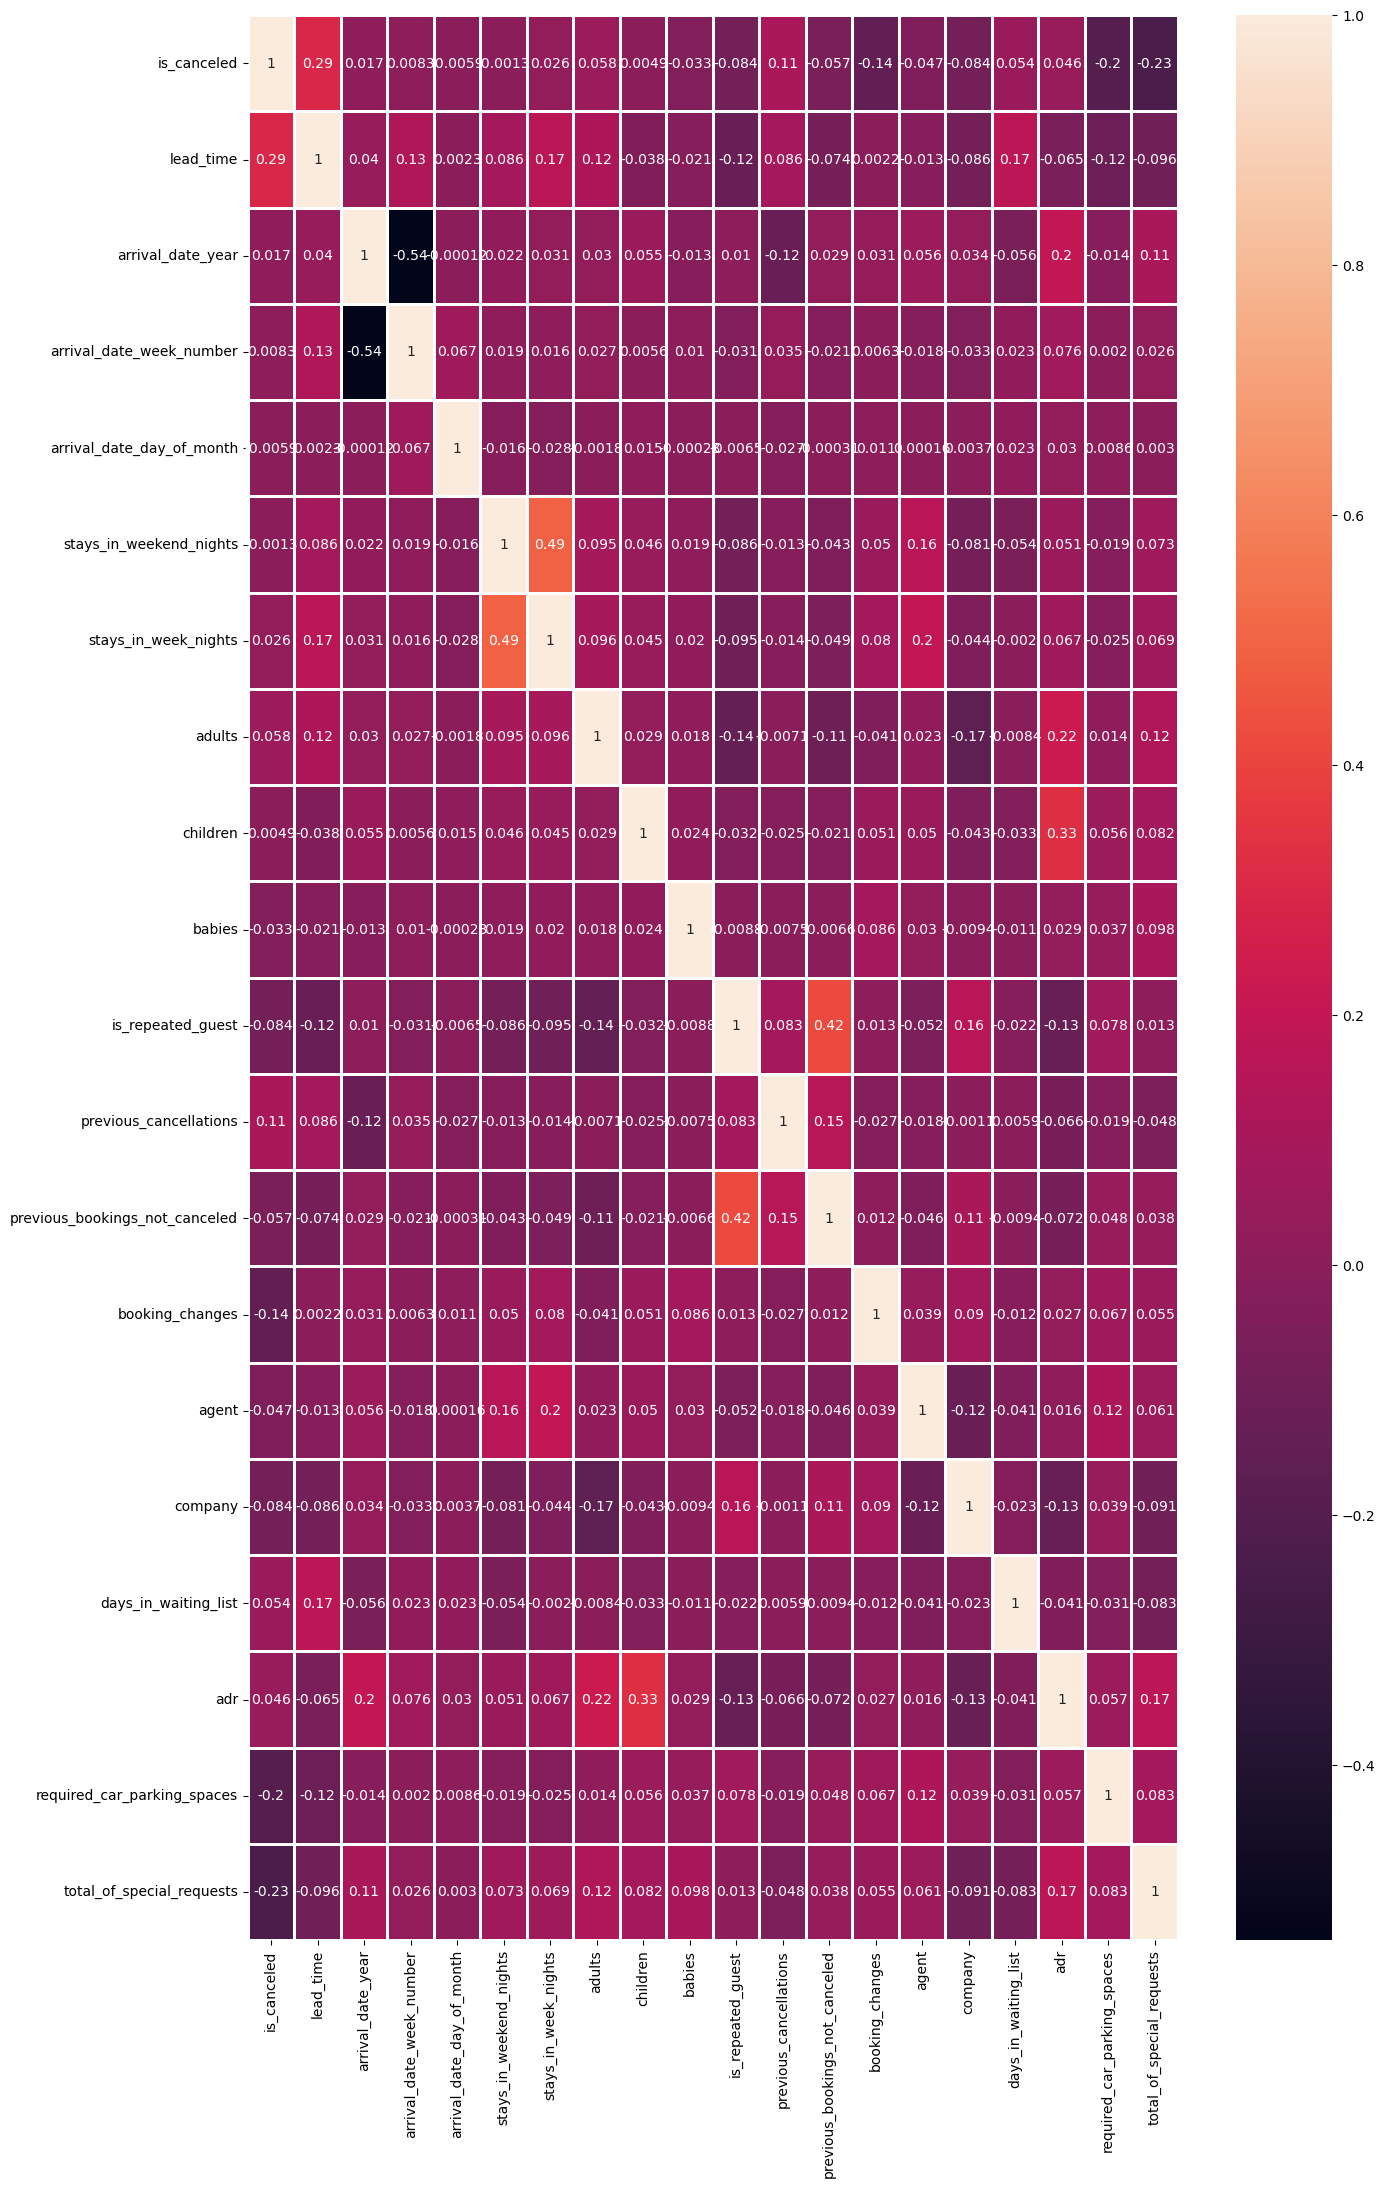

In [1559]:
plt.figure(figsize=(15,25))

corr = df.corr()
sns.heatmap(corr , annot =True , linewidths =1)
plt.show()

In [1560]:
df.shape

(119210, 32)

In [1561]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending=False)
correlation

C:\Users\arfan\AppData\Local\Temp\ipykernel_16108\595367748.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [1562]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [1563]:
useless_cols = ['arrival_date_year','days_in_waiting_list','assigned_room_type','booking_changes','country',
                'reservation_status', 'days_in_waiting_list']

df.drop(useless_cols , axis=1 , inplace = True)
 

C:\Users\arfan\AppData\Local\Temp\ipykernel_16108\3187040634.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1564]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type', 'deposit_type',
       'agent', 'company', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date'],
      dtype='object')

In [1565]:
cat_cols = list(df.select_dtypes(['object']).columns)
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [1566]:
cat_df = df[cat_cols]
cat_df.head()

hotel arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel               July   BB         Direct               Direct   
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient              2015-07-01  
1                  C   No Deposit     Transient              2015-07-01  
2                  A   No Deposit     Transient              2015-07-02  
3                  A   No Deposit     Transient              2015-07-02  
4                  A   No Deposit     Transient              2015-07-03

In [1567]:
cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year
cat_df['month'] = cat_df['reservation_status_date'].dt.month
cat_df['day'] = cat_df['reservation_status_date'].dt.day

C:\Users\arfan\AppData\Local\Temp\ipykernel_16108\969594972.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\arfan\AppData\Local\Temp\ipykernel_16108\969594972.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\arfan\AppData\Local\Temp\ipykernel_16108\969594972.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [1568]:
cat_df.drop(['reservation_status_date' , 'arrival_date_month'] , axis=1 , inplace = True )

C:\Users\arfan\AppData\Local\Temp\ipykernel_16108\367119033.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1569]:
cat_df.head()

cat_df2 = cat_df

In [1570]:
# Printing unique values of each column
for col in cat_df.columns:
    print(f"{col}:  \n{cat_df[col].unique() } \n" )
    
    # print(f"{col}: \n{cat_df[col].unique() }\n")

hotel:  
['Resort Hotel' 'City Hotel'] 

meal:  
['BB' 'FB' 'HB' 'SC' 'Undefined'] 

market_segment:  
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation'] 

distribution_channel:  
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS'] 

reserved_room_type:  
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B'] 

deposit_type:  
['No Deposit' 'Refundable' 'Non Refund'] 

customer_type:  
['Transient' 'Contract' 'Transient-Party' 'Group'] 

year:  
[2015 2014 2016 2017] 

month:  
[ 7  5  4  6  3  8  9  1 11 10 12  2] 

day:  
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31] 



In [1571]:
cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0 , 'City Hotel': 1})
cat_df['meal'] = cat_df['meal'].map({'BB':0 , 'FB':1 , 'HB': 2 , 'SC': 3 , 'Undefined':4})
cat_df['market_segment'] = cat_df['market_segment'].map({'Direct':0, 'Corporate':1, 'Online TA':2, 'Offline TA/TO':3,
                                                   'Complementary':4 , 'Groups' : 5 ,'Undefined':6 , 'Aviation':7 })

cat_df['distribution_channel']= cat_df['distribution_channel'].map({'Direct':0 , 'Corporate':1 , 'TA/TO':2 ,
                                                                    'Undefined':3 ,  'GDS':4 })

cat_df['reserved_room_type']= cat_df['reserved_room_type'].map({'C':0 , 'A':1, 'D':2, 'E':3 , 'G':4 , 'F':5 ,'H':6 , 
                                                                   'L':7, 'B':8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient':0, 'Contract':1, 'Transient-Party':2, 'Group':3})
cat_df['year'] = cat_df['year'].map({ 2015 : 0,  2014 :1 , 2016 :2,  2017 :3})

C:\Users\arfan\AppData\Local\Temp\ipykernel_16108\1337420148.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\arfan\AppData\Local\Temp\ipykernel_16108\1337420148.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\arfan\AppData\Local\Temp\ipykernel_16108\1337420148.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [1572]:
cat_df.head(50)

hotel  meal  market_segment  distribution_channel  reserved_room_type  \
0       0     0               0                     0                   0   
1       0     0               0                     0                   0   
2       0     0               0                     0                   1   
3       0     0               1                     1                   1   
4       0     0               2                     2                   1   
5       0     0               2                     2                   1   
6       0     0               0                     0                   0   
7       0     1               0                     0                   0   
8       0     0               2                     2                   1   
9       0     2               3                     2                   2   
10      0     0               2                     2                   3   
11      0     2               2                     2                   2   
12      0     0               2                     2                   2   
13      0     2               2                     2                   4   
14      0     0               2                     2                   3   
15      0     0               2                     2                   2   
16      0     0               3                     2                   3   
17      0     0               2                     2                   1   
18      0     0               1                     1                   1   
19      0     0               0                     0                   4   
20      0     0               2                     2                   5   
21      0     0               0                     0                   1   
22      0     0               0                     0                   1   
23      0     0               0                     0                   2   
24      0     2               3                     2                   2   
25      0     0               3                     2                   2   
26      0     0               3                     2                   2   
27      0     0               2                     2                   3   
28      0     0               2                     2                   1   
29      0     0               2                     2                   2   
30      0     0               0                     0                   1   
31      0     0               3                     2                   2   
32      0     0               0                     0                   3   
33      0     0               3                     2                   1   
34      0     0               2                     2                   2   
35      0     0               2                     2                   2   
36      0     0               2                     2                   1   
37      0     0               2                     2                   2   
38      0     0               2                     2                   2   
39      0     2               0                     0                   3   
40      0     0               2                     2                   4   
41      0     0               3                     2                   2   
42      0     0               0                     0                   5   
43      0     2               0                     0                   3   
44      0     0               2                     2                   1   
45      0     0               2                     2                   4   
46      0     0               3                     2                   1   
47      0     0               3                     2                   3   
48      0     2               3                     2                   1   
49      0     2               2                     2                   3   

    deposit_type  customer_type  year  month  day  
0              0        

### Performing Label Encoding 

### Now creating Numerical Data Frame 

In [1573]:
num_df = df.drop(columns= cat_cols , axis =1 )
num_df.head()

is_canceled  lead_time  arrival_date_week_number  \
0            0        342                        27   
1            0        737                        27   
2            0          7                        27   
3            0         13                        27   
4            0         14                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  previous_cancellations  \
0       2       0.0       0                  0                       0   
1       2       0.0       0                  0                       0   
2       1       0.0       0                  0                       0   
3       1       0.0       0                  0                       0   
4       2       0.0       0                  0                       0   

   previous_bookings_not_canceled  agent  company   adr  \
0                               0    0.0      0.0   0.0   
1                               0    0.0      0.0   0.0   
2                               0    0.0      0.0  75.0   
3                               0  304.0      0.0  75.0   
4                               0  240.0      0.0  98.0   

   required_car_parking_spaces  total_of_special_requests  
0                            0                          0  
1                            0                          0  
2                            0                          0  
3                            0                          0  
4                            0                          1

In [1574]:
num_df.drop(['is_canceled'] , axis =1 , inplace = True)
num_df

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0             342                        27                          1   
1             737                        27                          1   
2               7                        27                          1   
3              13                        27                          1   
4              14                        27                          1   
...           ...                       ...                        ...   
119385         23                        35                         30   
119386        102                        35                         31   
119387         34                        35                         31   
119388        109                        35                         31   
119389        205                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     5       2       0.0   
119386                        2                     5       3       0.0   
119387                        2                     5       2       0.0   
119388                        2                     5       2       0.0   
119389                        2                     7       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
0            0                  0                       0   
1            0                  0                       0   
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled  agent  company     adr  \
0                                    0    0.0      0.0    0.00   
1                                    0    0.0      0.0    0.00   
2                                    0    0.0      0.0   75.00   
3                                    0  304.0      0.0   75.00   
4                                    0  240.0      0.0   98.00   
...                                ...    ...      ...     ...   
119385                               0  394.0      0.0   96.14   
119386                               0    9.0      0.0  225.43   
119387                               0    9.0      0.0  157.71   
119388                               0   89.0      0.0  104.40   
119389                               0    9.0      0.0  151.20   

        required_car_parking_spaces  total_of_special_requests  
0                                 0                          0  
1                                 0                          0  
2                                 0                          0  
3                                 0                          0  
4                                 0                          1  
...                             ...                        ...  
119385                            0                          0  
119386                            0                          2  
119387                            0                          4  
119388                            0       

In [1575]:
num_df.var()

lead_time                         11422.361808
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
agent                             11485.169679
company                            2897.684308
adr                                2543.589039
required_car_parking_spaces           0.060201
total_of_special_requests             0.628652
dtype: float64

##### Logarithmic Transformation:

The logarithmic transformation is a commonly used technique to handle `right-skewed data`, where the majority of the data is concentrated towards smaller values, and there are a few large outliers.

By taking the logarithm of the data, you compress the range of larger values, which can help in reducing the influence of outliers and make the data more symmetrically distributed.

Logarithmic transformation is often used for data that follows an exponential or power-law distribution, such as income, population, or certain financial data.

In [1576]:
num_df['lead_time'] = np.log(num_df['lead_time'] +1)
num_df['arrival_date_week_number'] = np.log(num_df['arrival_date_week_number'] + 1)
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['agent'] = np.log(num_df['agent'] +1 )
num_df['company'] = np.log(num_df['company'] + 1 )
num_df['adr'] = np.log(num_df['adr'] + 1 )

C:\Users\arfan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

invalid value encountered in log



In [1577]:
num_df.var()

lead_time                         2.582757
arrival_date_week_number          0.440884
arrival_date_day_of_month         0.506325
stays_in_weekend_nights           0.990258
stays_in_week_nights              3.599010
adults                            0.330838
children                          0.159070
babies                            0.009508
is_repeated_guest                 0.030507
previous_cancellations            0.713887
previous_bookings_not_canceled    2.244415
agent                             3.535793
company                           1.346883
adr                               0.515480
required_car_parking_spaces       0.060201
total_of_special_requests         0.628652
dtype: float64

In [1578]:
# Checking for null values 

null = pd.DataFrame({ "null Vlaues":  num_df.isna().sum() , " Percentage Null Values":(num_df.isna().sum())/(num_df.shape[0])*(100)})

null

null Vlaues   Percentage Null Values
lead_time                                 0                 0.000000
arrival_date_week_number                  0                 0.000000
arrival_date_day_of_month                 0                 0.000000
stays_in_weekend_nights                   0                 0.000000
stays_in_week_nights                      0                 0.000000
adults                                    0                 0.000000
children                                  0                 0.000000
babies                                    0                 0.000000
is_repeated_guest                         0                 0.000000
previous_cancellations                    0                 0.000000
previous_bookings_not_canceled            0                 0.000000
agent                                     0                 0.000000
company                                   0                 0.000000
adr                                       1                 0.000839
required_car_parking_spaces               0                 0.000000
total_of_special_requests                 0                 0.000000

In [1579]:
num_df['adr'] = num_df['adr'].fillna( value = num_df['adr'].mean())

In [1580]:
null

null Vlaues   Percentage Null Values
lead_time                                 0                 0.000000
arrival_date_week_number                  0                 0.000000
arrival_date_day_of_month                 0                 0.000000
stays_in_weekend_nights                   0                 0.000000
stays_in_week_nights                      0                 0.000000
adults                                    0                 0.000000
children                                  0                 0.000000
babies                                    0                 0.000000
is_repeated_guest                         0                 0.000000
previous_cancellations                    0                 0.000000
previous_bookings_not_canceled            0                 0.000000
agent                                     0                 0.000000
company                                   0                 0.000000
adr                                       1                 0.000839
required_car_parking_spaces               0                 0.000000
total_of_special_requests                 0                 0.000000

In [1581]:
num_df.head()

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0   5.837730                  3.332205                   0.693147   
1   6.603944                  3.332205                   0.693147   
2   2.079442                  3.332205                   0.693147   
3   2.639057                  3.332205                   0.693147   
4   2.708050                  3.332205                   0.693147   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

      agent  company       adr  required_car_parking_spaces  \
0  0.000000      0.0  0.000000                            0   
1  0.000000      0.0  0.000000                            0   
2  0.000000      0.0  4.330733                            0   
3  5.720312      0.0  4.330733                            0   
4  5.484797      0.0  4.595120                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1

In [1582]:
X = pd.concat( [num_df , cat_df] , axis =1  )
X

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0        5.837730                  3.332205                   0.693147   
1        6.603944                  3.332205                   0.693147   
2        2.079442                  3.332205                   0.693147   
3        2.639057                  3.332205                   0.693147   
4        2.708050                  3.332205                   0.693147   
...           ...                       ...                        ...   
119385   3.178054                  3.583519                   3.433987   
119386   4.634729                  3.583519                   3.465736   
119387   3.555348                  3.583519                   3.465736   
119388   4.700480                  3.583519                   3.465736   
119389   5.327876                  3.583519                   3.401197   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     5       2       0.0   
119386                        2                     5       3       0.0   
119387                        2                     5       2       0.0   
119388                        2                     5       2       0.0   
119389                        2                     7       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
0            0                  0                       0   
1            0                  0                       0   
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled     agent  company       adr  \
0                                    0  0.000000      0.0  0.000000   
1                                    0  0.000000      0.0  0.000000   
2                                    0  0.000000      0.0  4.330733   
3                                    0  5.720312      0.0  4.330733   
4                                    0  5.484797      0.0  4.595120   
...                                ...       ...      ...       ...   
119385                               0  5.978886      0.0  4.576153   
119386                               0  2.302585      0.0  5.422436   
119387                               0  2.302585      0.0  5.067079   
119388                               0  4.499810      0.0  4.657763   
119389                               0  2.302585      0.0  5.025195   

        required_car_parking_spaces  total_of_special_requests  hotel  meal  \
0                                 0                          0      0     0   
1                                 0                          0      0     0   
2                                 0                          0      0     0   
3                                 0                          0      0     0   
4                                 0                          1      0     0   
...                             ...                        ...    ...   ...   
119385                            0                          0      1     0   


In [1586]:
X.drop('is_canceled' , axis =1 , inplace =True)

KeyError: "['is_canceled'] not found in axis"

In [1587]:
Y = df['is_canceled']

In [1588]:
print(X.shape , Y.shape)

(119210, 26) (119210,)


In [1589]:
# Splitting the Data into train and test set

xtrain,xtest , ytrain , ytest = train_test_split(X, Y , test_size = 0.30 , random_state = 25 , shuffle = True)
print(xtrain.shape , ytrain.shape)
print(xtest.shape , ytest.shape)

(83447, 26) (83447,)
(35763, 26) (35763,)


### Model Training 

##### Logistic Regression

In [1635]:
lr = LogisticRegression()
lr.fit(xtrain , ytrain)

C:\Users\arfan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [1636]:
pred_lr = lr.predict(xtest)
acc_lr = accuracy_score(ytest , pred_lr)
conf = confusion_matrix(ytest ,      pred_lr)
clf_report = classification_report(ytest , pred_lr)

In [1637]:
print(f'Accuracy of Logistic Regression  is : {acc_lr} ')
print(f'\nConfusion Matrix  is :\n \n{conf}')
print(f'\n Classification Report is :\n\n {clf_report}')

Accuracy of Logistic Regression  is : 0.8113692922853228 

Confusion Matrix  is :
 
[[21326  1213]
 [ 5533  7691]]

 Classification Report is :

               precision    recall  f1-score   support

           0       0.79      0.95      0.86     22539
           1       0.86      0.58      0.70     13224

    accuracy                           0.81     35763
   macro avg       0.83      0.76      0.78     35763
weighted avg       0.82      0.81      0.80     35763



#### KNN 

In [1638]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain , ytrain)
pred_knn = knn.predict(xtest)
acc_knn = accuracy_score(ytest , pred_knn)
conf = confusion_matrix(ytest , pred_knn)
clf_report = classification_report(ytest , pred_knn)

print(f"The accuracy score of KNN : {acc_knn}")
print(f"\nThe confusion matrix of KNN : \n\n{conf}")
print(f"\nThe classification report for KNN : \n{clf_report}")

The accuracy score of KNN : 0.8931018091323435

The confusion matrix of KNN : 

[[21725   814]
 [ 3009 10215]]

The classification report for KNN : 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     22539
           1       0.93      0.77      0.84     13224

    accuracy                           0.89     35763
   macro avg       0.90      0.87      0.88     35763
weighted avg       0.90      0.89      0.89     35763



### Decision Tree Classifier 

In [1639]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain , ytrain)

DecisionTreeClassifier()

In [1640]:
pred_dtc = dtc.predict(xtest)
acc_dtc =accuracy_score(ytest , pred_dtc)
conf_dtc = confusion_matrix(ytest , pred_dtc)
clf_report_dtc = classification_report(ytest , pred_dtc)

print(f'The accuracy of Decision Tree classifier is :{acc_dtc}')
print(f"\nConfusion Matrix for  Decision Tree classifier is : \n\n{conf_dtc}")
print(f"\n\n Classification for Decision Tree classifier is : \n\n{clf_report_dtc}")

The accuracy of Decision Tree classifier is :0.949416995218522

Confusion Matrix for  Decision Tree classifier is : 

[[21613   926]
 [  883 12341]]


 Classification for Decision Tree classifier is : 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22539
           1       0.93      0.93      0.93     13224

    accuracy                           0.95     35763
   macro avg       0.95      0.95      0.95     35763
weighted avg       0.95      0.95      0.95     35763



### Random Forest 

In [1641]:
rf = RandomForestClassifier()
rf.fit(xtrain , ytrain)

RandomForestClassifier()

In [1642]:
pred_rf = rf.predict(xtest)
acc_rf = accuracy_score(ytest , pred_rf)
cm_rf = confusion_matrix(ytest , pred_rf)
clf_report = classification_report(ytest , pred_rf)

print(f'Accuracy of Random Forest id : {acc_rf}')
print(f'\n\nConfusion Matrix for Random Forest :\n\n {cm_rf }')
print(f'\n\nClassification_report of Random Forest :\n\n { clf_report}')

Accuracy of Random Forest id : 0.9553728714034058


Confusion Matrix for Random Forest :

 [[22342   197]
 [ 1399 11825]]


Classification_report of Random Forest :

               precision    recall  f1-score   support

           0       0.94      0.99      0.97     22539
           1       0.98      0.89      0.94     13224

    accuracy                           0.96     35763
   macro avg       0.96      0.94      0.95     35763
weighted avg       0.96      0.96      0.95     35763



### Models Comparison

In [1650]:
models = pd.DataFrame({'Model':["Logistic Regression" , "KNN" , "Decision Tree Classifier" , "Random Forest Classifier"],
                       'score':[acc_lr , acc_knn , acc_dtc , acc_rf]
                      })

models.sort_values(by='score' , ascending = False)

Model     score
3  Random Forest Classifier  0.955373
2  Decision Tree Classifier  0.949417
1                       KNN  0.893102
0       Logistic Regression  0.811369

In [1654]:
px.bar(data_frame = models , x='score' , y= 'Model' , color = 'score' ,template = 'plotly_white', title = 'Models_Comparison')
